## Importing packeges

In [2]:
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline

def variance(X):
    return var(X)

def Average(X):
    return average(X)    
    
    
def analyze(temparature,L,E,M):
    u,u_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    M2=[i**2 for i in M]
    M4=[i**4 for i in M]
    m2,m2_err=jacknife(M2,Average)
    m4,m4_err=jacknife(M4,Average)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[m2,m2_err],[m4,m4_err],[u,u_err]


## VERIFICATION FOR ALGOS

### READING FROM FILE TO VERIFY

In [4]:
BASE_FOLDER='../multi_histo_data/'

In [7]:
f=open(BASE_FOLDER+'fnames.txt','r')
fnames1=[]
l=f.readline()
while l:
    fnames1.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print(len(fnames1))

5


In [18]:
NUMS=[20,22,24,26,28,30,32]
fnames=[]
for i in NUMS:
    for j in fnames1:
        fnames.append(str(j.replace('32',str(i))))

## EXTRACTING FROM MCMC DATA

In [6]:
ml=10000
sampled=[]
analy=dict()
i=-1
extracted_vals=dict()
rslt=open('cppanalysis/N24','w')
# cfit=open('cppanalysis/cfit_ising_all_2','w')
rslt.write('Temp,N,mag,mag_err,sp_heat,sp_heat_err,sucep,sucep_err')
rslt.write('M2,M2_err,M4,M4_err,U,U_err \n')
# cfit.write('N,temp,Xi,Xi_err\n')
l=len(fnames)
j=0
for fn in fnames:
    i+=1
    dat=get_data(fn);
    try:
        L=dat['params']['length of lattice  '];
    except:
        L=dat['params']['N '];    
    try:
        T=dat['params']['T   '];
    except:
        T=dat['params']['T '];    
    if T<0.75:
        continue
    j+=1
    print("Doing ",i+1,"(",j,") /",l, " L : ",L," T : ",T,"   ",fn)
    N=L*L
    sdata=sample_data(dat,Max_lags=ml);
    analy=analyze(T,N,sdata['energy'],sdata['magentization'])
    rslt.write(str(T)+","+str(L)+","+str(analy[0][0])+","+str(analy[0][1]))
    rslt.write(","+str(analy[1][0])+","+str(analy[1][1]))
    rslt.write(","+str(analy[2][0])+","+str(analy[2][1]))
    rslt.write(","+str(analy[3][0])+","+str(analy[3][1]))
    rslt.write(","+str(analy[4][0])+","+str(analy[4][1]))
    rslt.write(","+str(analy[5][0])+","+str(analy[5][1])+'\n')
rslt.close()


Doing  1 ( 1 ) / 5  L :  26  T :  2.15     ../multi_histo_data/N26/N_26_T_2.150_ising.datRL.txt
Doing  2 ( 2 ) / 5  L :  26  T :  2.2     ../multi_histo_data/N26/N_26_T_2.200_ising.datRL.txt
Doing  3 ( 3 ) / 5  L :  26  T :  2.25     ../multi_histo_data/N26/N_26_T_2.250_ising.datRL.txt
Doing  4 ( 4 ) / 5  L :  26  T :  2.3     ../multi_histo_data/N26/N_26_T_2.300_ising.datRL.txt
Doing  5 ( 5 ) / 5  L :  26  T :  2.35     ../multi_histo_data/N26/N_26_T_2.350_ising.datRL.txt


## READING THE EXTRACTED DATA FOR ISING

In [9]:
f=open('cppanalysis/N26','r')
extracted_vals_ori=dict()
l=f.readline()
l=f.readline()
i=0
while l:
    i+=1
    try:
        it=l[:-1].split(',')
    #         print(it)
        L=int(it[1])
        if L not in extracted_vals_ori.keys():
            extracted_vals_ori.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                      'sucep':[],'sucep_err':[],'m2':[],'m2_err':[],'m4':[],'m4_err':[],
                                       'u':[],'u_err':[]}})
        extracted_vals_ori[L]['T'].append(float(it[0]))
        extracted_vals_ori[L]['mag'].append(float(it[2]))
        extracted_vals_ori[L]['mag_err'].append(float(it[3]))
        extracted_vals_ori[L]['sp_heat'].append(float(it[4]))
        extracted_vals_ori[L]['sp_heat_err'].append(float(it[5]))
        extracted_vals_ori[L]['sucep'].append(float(it[6]))
        extracted_vals_ori[L]['sucep_err'].append(float(it[7]))
        extracted_vals_ori[L]['m2'].append(float(it[8]))
        extracted_vals_ori[L]['m2_err'].append(float(it[9]))
        extracted_vals_ori[L]['m4'].append(float(it[10]))
        extracted_vals_ori[L]['m4_err'].append(float(it[11]))
        extracted_vals_ori[L]['u'].append(float(it[12]))
        extracted_vals_ori[L]['u_err'].append(float(it[13]))
        l=f.readline()
    except:
        print(it)
        l=f.readline()
f.close()
print(i)


5


<Container object of 3 artists>

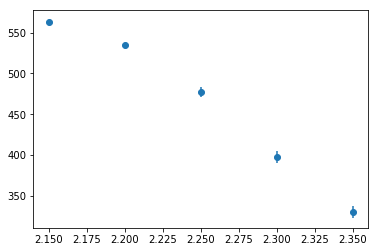

In [11]:
k=26
lbl='mag'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')

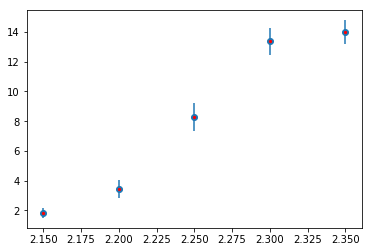

In [12]:
k=26
lbl='sucep'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')
lbl1='m2'
lbl2='mag'
lbl3='sucep'
varian=[(i-j*j)/(l*k**2) for i,j,l in zip(extracted_vals_ori[k][lbl1],extracted_vals_ori[k][lbl2],extracted_vals_ori[k]['T']) ]
plt.scatter(extracted_vals_ori[k]['T'],varian,c='r',s=5,zorder=6)

In [13]:
f=open('../extracted_data/N26','r')
mh_vals={'T':[],'e1':[],'e2':[],'mag':[],'m2':[],'m4':[]}

l=f.readline()
l=f.readline()
i=0
while l:
    i+=1
    try:
        it=l[:-1].split(',')
        mh_vals['T'].append(float(it[0]))
        mh_vals['e1'].append(float(it[1]))
        mh_vals['e2'].append(float(it[2]))
        mh_vals['mag'].append(float(it[3]))
        mh_vals['m2'].append(float(it[4]))
        mh_vals['m4'].append(float(it[5]))
        l=f.readline()
    except:
        print(it)
        l=f.readline()
f.close()
print(i)


0


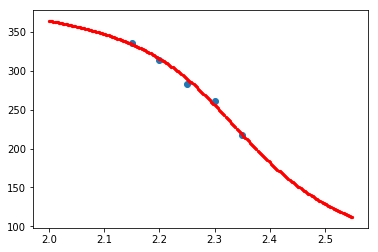

In [14]:
lbl='mag'
plt.scatter(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],zorder=0)
plt.scatter(mh_vals['T'],mh_vals[lbl],c='r',s=5,zorder=1)

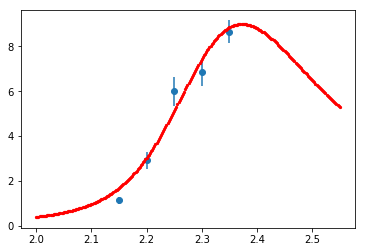

In [15]:
k=20
lbl='sucep'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')
lbl1='m2'
lbl2='mag'
varian=[(i-j*j)/(l*k**2) for i,j,l in zip(mh_vals[lbl1],mh_vals[lbl2],mh_vals['T']) ]
plt.scatter(mh_vals['T'],varian,c='r',s=5,zorder=6)

## MAKE CONFIG

In [89]:
BASE_FOLDER='../multi_histo_data/'

In [90]:
f=open(BASE_FOLDER+'fnames.txt','r')
fnames=[]
l=f.readline()
while(l):
    fnames.append(l[:-1])
    l=f.readline()
f.close()
print(len(fnames))

4


In [91]:
Max_lags=9000
fit_count_of_acf=Max_lags
tol=0.5
f=open(BASE_FOLDER+'hist.config','w')
for nme in fnames:
    data=get_data(BASE_FOLDER+nme)
    tau,err,status=get_correlation_values(data['time'][-Max_lags:],data['energy'][-Max_lags:],
                            data['magentization'][-Max_lags:],Max_lags,fit_count_of_acf,tol)
    print(nme," -> ",tau," , ",err," , ",status)
    f.write(nme[:-6]+","+str(tau)+","+str(err)+","+str(status).lower()+'\n')
f.close()   

N32_long/N_32_T_2.100_ising.datRL.txt  ->  2  ,  0.022375716825948765  ,  True
N32_long/N_32_T_2.200_ising.datRL.txt  ->  3  ,  0.03890471577221767  ,  True
N32_long/N_32_T_2.300_ising.datRL.txt  ->  5  ,  0.08799413393271968  ,  True
N32_long/N_32_T_2.400_ising.datRL.txt  ->  10  ,  0.20771395158400566  ,  True
